## Clean data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("RawData.csv")
df

C:\Users\DUC VAN\AppData\Local\Temp\ipykernel_24044\1498686140.py:1: DtypeWarning: Columns (5,31,32,34,35,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("RawData.csv")


,ID,List ID,Posted Time,Status,Transaction Type,Seller Name,Seller ID,Region (Code),Region Name,Category,...,Land Type (Text),Width (Text),Ad ID,State,Floors,Rooms,Toilets,Furnishing Sell,District,District Name
0,154269561,113584228,31/01/2025,accepted,s,Khang anh,24585559.0,3,Đà Nẵng,1040,...,Đất nông nghiệp,Ngang 4 m,0,0,0.0,0.0,0.0,0.0,quận liên chiểu,Quận Liên Chiểu
1,164081534,122031985,07/02/2025,accepted,s,Minh trí,12588075.0,3,Đà Nẵng,1040,...,Đất nông nghiệp,Ngang 5 m,0,0,0.0,0.0,0.0,0.0,quận liên chiểu,Quận Liên Chiểu
2,156854814,115807159,31/01/2025,accepted,s,Khang anh,24585559.0,3,Đà Nẵng,1040,...,Đất nông nghiệp,Ngang 10 m,0,0,0.0,0.0,0.0,0.0,quận liên chiểu,Quận Liên Chiểu
3,163242245,121308677,31/01/2025,accepted,s,Khang anh,24585559.0,3,Đà Nẵng,1040,...,Đất nông nghiệp,Ngang 5 m,0,0,0.0,0.0,0.0,0.0,quận cẩm lệ,Quận Cẩm Lệ
4,162985943,121088552,01/02/2025,accepted,s,Khang anh,4483578.0,3,Đà Nẵng,1040,...,Đất nông nghiệp,Ngang 5 m,0,0,0.0,0.0,0.0,0.0,quận liên chiểu,Quận Liên Chiểu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27203,0,122344600,18/04/2025,0,s,NaN,NaN,0,0,1020,...,NaN,NaN,164443606,accepted,NaN,3.0,NaN,NaN,NaN,Quận Thanh Khê
27204,0,121829932,11/04/2025,0,s,NaN,NaN,0,0,1020,...,NaN,NaN,163847619,accepted,6.0,11.0,7.0,2.0,NaN,Quận Ngũ Hành Sơn
27205,0,124097427,10/04/2025,0,s,NaN,NaN,0,0,1020,...,NaN,NaN,166476777,accepted,3.0,5.0,5.0,3.0,NaN,Quận Ngũ Hành Sơn
27206,0,123982261,15/04/2025,0,s,NaN,NaN,0,0,1020,...,NaN,NaN,166342836,accepted,3.0,4.0,5.0,1.0,NaN,Quận Cẩm Lệ


In [3]:
df = df[
    [
        "Posted Time", "Category Name", "Ward Name", "District Name",
        "Street Name", "Area", "Width", "Length", "Land Type",
        "Legal Status", "House Direction", "Property Features",
        "Floors", "Rooms", "Toilets", "Furnishing Sell", "Price per m²"
    ]
]

df_initial = df.copy()
df

,Posted Time,Category Name,Ward Name,District Name,Street Name,Area,Width,Length,Land Type,Legal Status,House Direction,Property Features,Floors,Rooms,Toilets,Furnishing Sell,Price per m²
0,31/01/2025,Đất,Phường Hòa Minh,Quận Liên Chiểu,Thanh vinh 15,100.0,4.0000,25.0000,4,6.0,5.0,2; 4,0.0,0.0,0.0,0.0,1.500000
1,07/02/2025,Đất,Phường Hòa Khánh Nam,Quận Liên Chiểu,Đường Hoàng Văn Thái,102.0,5.0000,23.0000,4,6.0,8.0,3,0.0,0.0,0.0,0.0,1.617647
2,31/01/2025,Đất,Phường Hòa Khánh Nam,Quận Liên Chiểu,Đường Đà Sơn,150.0,10.0000,15.0000,4,6.0,6.0,2; 3; 4,0.0,0.0,0.0,0.0,1.666667
3,31/01/2025,Đất,Phường Hòa Phát,Quận Cẩm Lệ,Vũ lăng,100.0,5.0000,20.0000,4,5.0,6.0,4; 2; 3,0.0,0.0,0.0,0.0,2.500000
4,01/02/2025,Đất,Phường Hòa Khánh Bắc,Quận Liên Chiểu,Âu cơ,100.0,5.0000,20.0000,4,5.0,4.0,4; 2,0.0,0.0,0.0,0.0,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27203,18/04/2025,Nhà ở,Phường Vĩnh Trung,Quận Thanh Khê,Đường Nguyễn Văn Linh,103.0,NaN,NaN,0,1.0,NaN,0,NaN,3.0,NaN,NaN,257.281560
27204,11/04/2025,Nhà ở,Phường Mỹ An,Quận Ngũ Hành Sơn,Đường Lê Quang Đạo,172.0,6.0000,28.0000,0,1.0,1.0,0,6.0,11.0,7.0,2.0,187.110460
27205,10/04/2025,Nhà ở,Phường Mỹ An,Quận Ngũ Hành Sơn,Đường Bà Huyện Thanh Quan,280.0,11.0000,25.4500,0,1.0,NaN,0,3.0,5.0,5.0,3.0,116.071430
27206,15/04/2025,Nhà ở,Phường Hòa Xuân,Quận Cẩm Lệ,Đường Giáng Hương 2,322.0,12.0000,26.8332,0,1.0,6.0,0,3.0,4.0,5.0,1.0,110.248440


In [4]:
df.rename(columns={"Price per m²": "Price per m2"}, inplace=True)

C:\Users\DUC VAN\AppData\Local\Temp\ipykernel_24044\973838445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"Price per m²": "Price per m2"}, inplace=True)


### Handling missing data

#### Lost data statistics

In [5]:
print(df.isnull().sum())

Posted Time              0
Category Name            0
Ward Name                2
District Name          487
Street Name              1
Area                     1
Width                 6221
Length               10063
Land Type                0
Legal Status             1
House Direction      11896
Property Features     4233
Floors                4303
Rooms                    1
Toilets               3037
Furnishing Sell       6021
Price per m2             1
dtype: int64


In [6]:
df.dropna(subset=["Ward Name"], inplace=True)
df.dropna(subset=["District Name"], inplace=True)
df.dropna(subset=["Area"], inplace=True)
df.dropna(subset=["Price per m2"], inplace=True)
df.dropna(subset=["Rooms"], inplace=True)

C:\Users\DUC VAN\AppData\Local\Temp\ipykernel_24044\3967538017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["Ward Name"], inplace=True)
C:\Users\DUC VAN\AppData\Local\Temp\ipykernel_24044\3967538017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["District Name"], inplace=True)
C:\Users\DUC VAN\AppData\Local\Temp\ipykernel_24044\3967538017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### For the Width and Length variables

*After the statistics we know that the area data is complete, then check if there is width but no length or vice versa, then use the area calculation formula. If both features are empty, the default is 5 for width and 5 for length*

In [7]:
# If Length is empty but Width exists, then calculate Length
df.loc[df["Length"].isna() & df["Width"].notna(), "Length"] = (
df["Area"] / df["Width"]
)

# If Width is empty but Length exists, then calculate Width
df.loc[df["Width"].isna() & df["Length"].notna(), "Width"] = (
df["Area"] / df["Length"]
)

# If both Width and Length are empty, set Width = 5 and calculate Length
missing_indexes = df[df["Width"].isna() & df["Length"].isna()].index
df.loc[missing_indexes, "Length"] = df.loc[missing_indexes, "Area"] / 5
df.loc[missing_indexes, "Width"] = 5

In [8]:
before_count = (df_initial["Width"].dropna().clip(0, 100) == 5).sum()
after_count = (df["Width"].dropna().clip(0, 100) == 5).sum()

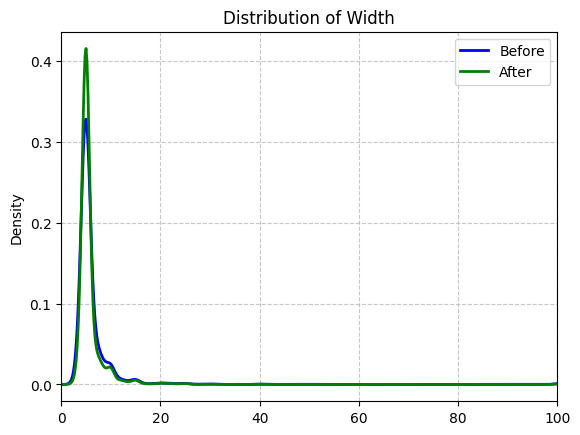

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_initial["Width"].dropna().clip(0, 100).plot(kind='kde', ax=ax, color='blue', label="Before", linewidth=2)
df["Width"].dropna().clip(0, 100).plot(kind='kde', ax=ax, color='green', label="After", linewidth=2)
ax.set_xlim(0, 100)
ax.grid(True, linestyle="--", alpha=0.7)
ax.legend(loc='best')
ax.set_title("Distribution of Width")
plt.show()

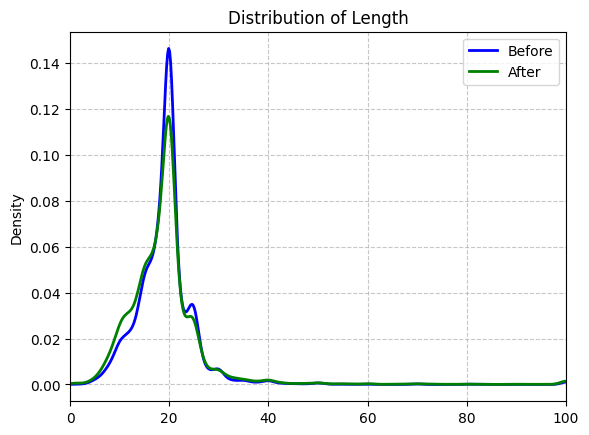

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_initial["Length"].dropna().clip(0, 100).plot(kind='kde', ax=ax, color='blue', label="Before", linewidth=2)
df["Length"].dropna().clip(0, 100).plot(kind='kde', ax=ax, color='green', label="After", linewidth=2)
ax.set_xlim(0, 100)
ax.grid(True, linestyle="--", alpha=0.7)
ax.legend(loc='best')
ax.set_title("Distribution of Length")
plt.show()

In [11]:
def replace_invalid_house_direction(direction):
    if pd.isna(direction):
        return random.randint(1, 8)
    return direction  

df["House Direction"] = df["House Direction"].apply(replace_invalid_house_direction)

C:\Users\DUC VAN\AppData\Local\Temp\ipykernel_24044\2562958160.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["House Direction"] = df["House Direction"].apply(replace_invalid_house_direction)


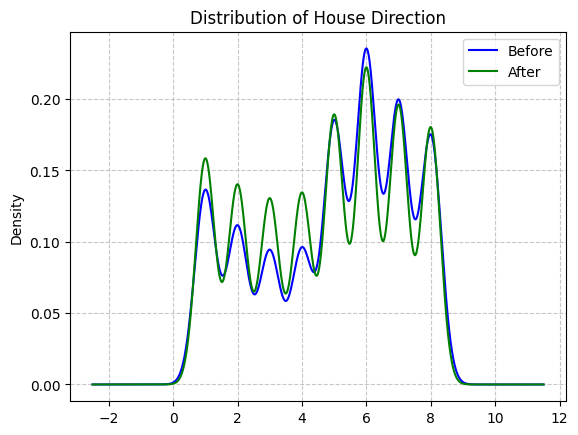

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_initial["House Direction"].dropna().plot(kind='kde', ax=ax, color='blue', label="Before")
df["House Direction"].dropna().plot(kind='kde', ax=ax, color='green', label="After")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.grid(True, linestyle="--", alpha=0.7)
ax.set_title("Distribution of House Direction")
plt.show()


In [13]:
df.loc[(df["Land Type"] == 1) & (df["Property Features"].isna()), "Property Features"] = "3"
df.loc[(df["Land Type"] != 1) & (df["Property Features"].isna()), "Property Features"] = "4"
df

,Posted Time,Category Name,Ward Name,District Name,Street Name,Area,Width,Length,Land Type,Legal Status,House Direction,Property Features,Floors,Rooms,Toilets,Furnishing Sell,Price per m2
0,31/01/2025,Đất,Phường Hòa Minh,Quận Liên Chiểu,Thanh vinh 15,100.0,4.0000,25.0000,4,6.0,5.0,2; 4,0.0,0.0,0.0,0.0,1.500000
1,07/02/2025,Đất,Phường Hòa Khánh Nam,Quận Liên Chiểu,Đường Hoàng Văn Thái,102.0,5.0000,23.0000,4,6.0,8.0,3,0.0,0.0,0.0,0.0,1.617647
2,31/01/2025,Đất,Phường Hòa Khánh Nam,Quận Liên Chiểu,Đường Đà Sơn,150.0,10.0000,15.0000,4,6.0,6.0,2; 3; 4,0.0,0.0,0.0,0.0,1.666667
3,31/01/2025,Đất,Phường Hòa Phát,Quận Cẩm Lệ,Vũ lăng,100.0,5.0000,20.0000,4,5.0,6.0,4; 2; 3,0.0,0.0,0.0,0.0,2.500000
4,01/02/2025,Đất,Phường Hòa Khánh Bắc,Quận Liên Chiểu,Âu cơ,100.0,5.0000,20.0000,4,5.0,4.0,4; 2,0.0,0.0,0.0,0.0,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27203,18/04/2025,Nhà ở,Phường Vĩnh Trung,Quận Thanh Khê,Đường Nguyễn Văn Linh,103.0,5.0000,20.6000,0,1.0,2.0,0,NaN,3.0,NaN,NaN,257.281560
27204,11/04/2025,Nhà ở,Phường Mỹ An,Quận Ngũ Hành Sơn,Đường Lê Quang Đạo,172.0,6.0000,28.0000,0,1.0,1.0,0,6.0,11.0,7.0,2.0,187.110460
27205,10/04/2025,Nhà ở,Phường Mỹ An,Quận Ngũ Hành Sơn,Đường Bà Huyện Thanh Quan,280.0,11.0000,25.4500,0,1.0,6.0,0,3.0,5.0,5.0,3.0,116.071430
27206,15/04/2025,Nhà ở,Phường Hòa Xuân,Quận Cẩm Lệ,Đường Giáng Hương 2,322.0,12.0000,26.8332,0,1.0,6.0,0,3.0,4.0,5.0,1.0,110.248440


C:\Users\DUC VAN\AppData\Local\Temp\ipykernel_24044\4273470229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Property Features"] = df["Property Features"].astype(str).str.split(";")


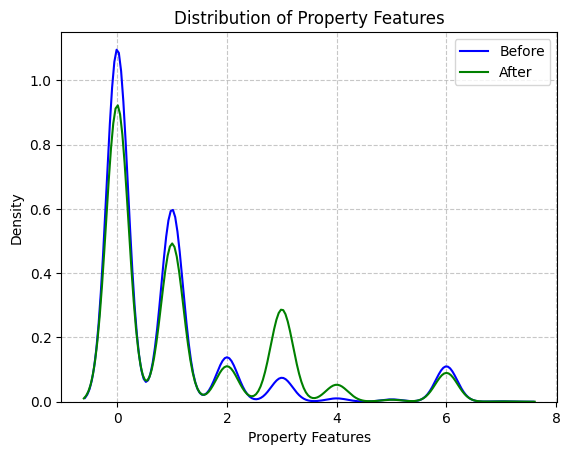

In [14]:
# Convert the 'Property Features' column into a list
df_initial["Property Features"] = df_initial["Property Features"].astype(str).str.split(";")
df["Property Features"] = df["Property Features"].astype(str).str.split(";")

# Expand each value in the array into separate rows
df_initial_exploded = df_initial.explode("Property Features")
df_exploded = df.explode("Property Features")

# Convert values to numeric type
df_initial_exploded["Property Features"] = pd.to_numeric(df_initial_exploded["Property Features"], errors="coerce")
df_exploded["Property Features"] = pd.to_numeric(df_exploded["Property Features"], errors="coerce")

# Plot KDE
fig = plt.figure()
ax = fig.add_subplot(111)

sns.kdeplot(df_initial_exploded["Property Features"].dropna(), ax=ax, color='blue', label="Before")
sns.kdeplot(df_exploded["Property Features"].dropna(), ax=ax, color='green', label="After")
ax.grid(True, linestyle="--", alpha=0.7)
ax.legend()
ax.set_title("Distribution of Property Features")
plt.show()


In [15]:
feature_mapping = {
    0: "No thing",
    1: "Frontage",
    2: "Back Expansion",
    3: "1 Part Residential",
    4: "No Residential",
    5: "Car Alley",
    6: "No Residential",
    7: "All Residential"
}

df["Property Features"] = df["Property Features"].apply(lambda x: [feature_mapping[int(num)] for num in x])
df.head()

C:\Users\DUC VAN\AppData\Local\Temp\ipykernel_24044\2093904904.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Property Features"] = df["Property Features"].apply(lambda x: [feature_mapping[int(num)] for num in x])


,Posted Time,Category Name,Ward Name,District Name,Street Name,Area,Width,Length,Land Type,Legal Status,House Direction,Property Features,Floors,Rooms,Toilets,Furnishing Sell,Price per m2
0,31/01/2025,Đất,Phường Hòa Minh,Quận Liên Chiểu,Thanh vinh 15,100.0,4.0,25.0,4,6.0,5.0,"[Back Expansion, No Residential]",0.0,0.0,0.0,0.0,1.500000
1,07/02/2025,Đất,Phường Hòa Khánh Nam,Quận Liên Chiểu,Đường Hoàng Văn Thái,102.0,5.0,23.0,4,6.0,8.0,[1 Part Residential],0.0,0.0,0.0,0.0,1.617647
2,31/01/2025,Đất,Phường Hòa Khánh Nam,Quận Liên Chiểu,Đường Đà Sơn,150.0,10.0,15.0,4,6.0,6.0,"[Back Expansion, 1 Part Residential, No Reside...",0.0,0.0,0.0,0.0,1.666667
3,31/01/2025,Đất,Phường Hòa Phát,Quận Cẩm Lệ,Vũ lăng,100.0,5.0,20.0,4,5.0,6.0,"[No Residential, Back Expansion, 1 Part Reside...",0.0,0.0,0.0,0.0,2.500000
4,01/02/2025,Đất,Phường Hòa Khánh Bắc,Quận Liên Chiểu,Âu cơ,100.0,5.0,20.0,4,5.0,4.0,"[No Residential, Back Expansion]",0.0,0.0,0.0,0.0,2.500000


In [16]:
df['Floors'] = df.apply(lambda row: np.floor((row['Rooms'] - 1) / 2) + 1 if pd.isnull(row['Floors']) else row['Floors'], axis=1)

C:\Users\DUC VAN\AppData\Local\Temp\ipykernel_24044\4283836677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Floors'] = df.apply(lambda row: np.floor((row['Rooms'] - 1) / 2) + 1 if pd.isnull(row['Floors']) else row['Floors'], axis=1)


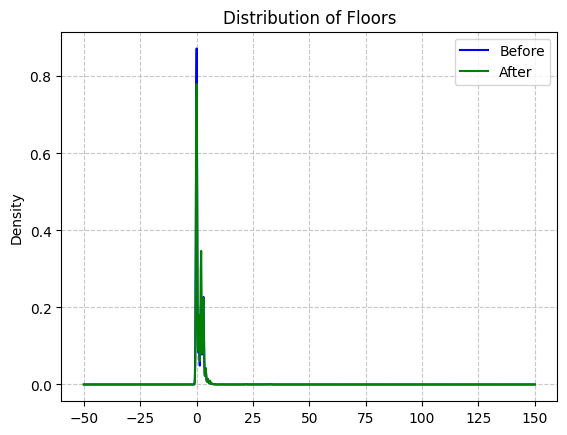

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_initial["Floors"].dropna().plot(kind='kde', ax=ax, color='blue', label="Before")
df["Floors"].dropna().plot(kind='kde', ax=ax, color='green', label="After")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.grid(True, linestyle="--", alpha=0.7)
ax.set_title("Distribution of Floors")
plt.show()


In [18]:
df['Toilets'] = df.apply(lambda row: row['Floors'] if pd.isna(row['Toilets']) else row['Toilets'], axis=1)

C:\Users\DUC VAN\AppData\Local\Temp\ipykernel_24044\3944995222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Toilets'] = df.apply(lambda row: row['Floors'] if pd.isna(row['Toilets']) else row['Toilets'], axis=1)


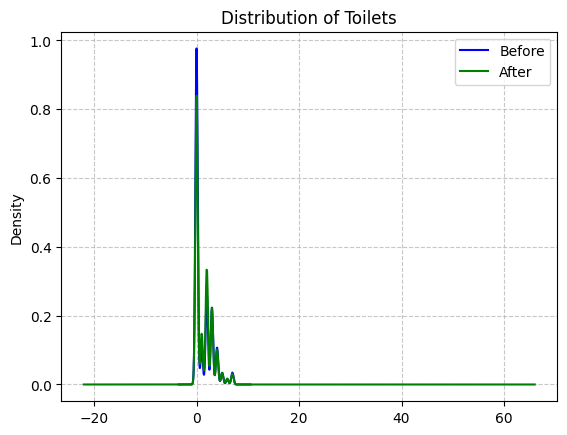

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_initial["Toilets"].dropna().plot(kind='kde', ax=ax, color='blue', label="Before")
df["Toilets"].dropna().plot(kind='kde', ax=ax, color='green', label="After")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.grid(True, linestyle="--", alpha=0.7)
ax.set_title("Distribution of Toilets")
plt.show()

In [20]:
df["Furnishing Sell"] = df["Furnishing Sell"].apply(lambda x: np.random.randint(0, 3) if pd.isna(x) else x)

C:\Users\DUC VAN\AppData\Local\Temp\ipykernel_24044\2247739851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Furnishing Sell"] = df["Furnishing Sell"].apply(lambda x: np.random.randint(0, 3) if pd.isna(x) else x)


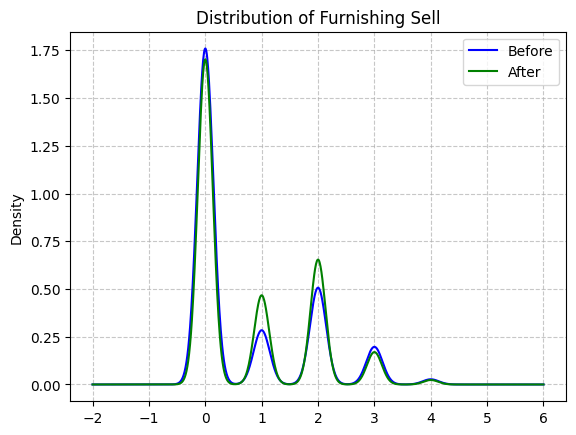

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_initial["Furnishing Sell"].dropna().plot(kind='kde', ax=ax, color='blue', label="Before")
df["Furnishing Sell"].dropna().plot(kind='kde', ax=ax, color='green', label="After")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.grid(True, linestyle="--", alpha=0.7)
ax.set_title("Distribution of Furnishing Sell")
plt.show()

In [22]:
print(df.isnull().sum())

Posted Time          0
Category Name        0
Ward Name            0
District Name        0
Street Name          0
Area                 0
Width                0
Length               0
Land Type            0
Legal Status         0
House Direction      0
Property Features    0
Floors               0
Rooms                0
Toilets              0
Furnishing Sell      0
Price per m2         0
dtype: int64


In [23]:
df_land = df[df["Category Name"] == "Đất"]
df_land = df_land.drop(columns=["Category Name"]) 
df_land

,Posted Time,Ward Name,District Name,Street Name,Area,Width,Length,Land Type,Legal Status,House Direction,Property Features,Floors,Rooms,Toilets,Furnishing Sell,Price per m2
0,31/01/2025,Phường Hòa Minh,Quận Liên Chiểu,Thanh vinh 15,100.0000,4.0,25.000000,4,6.0,5.0,"[Back Expansion, No Residential]",0.0,0.0,0.0,0.0,1.500000
1,07/02/2025,Phường Hòa Khánh Nam,Quận Liên Chiểu,Đường Hoàng Văn Thái,102.0000,5.0,23.000000,4,6.0,8.0,[1 Part Residential],0.0,0.0,0.0,0.0,1.617647
2,31/01/2025,Phường Hòa Khánh Nam,Quận Liên Chiểu,Đường Đà Sơn,150.0000,10.0,15.000000,4,6.0,6.0,"[Back Expansion, 1 Part Residential, No Reside...",0.0,0.0,0.0,0.0,1.666667
3,31/01/2025,Phường Hòa Phát,Quận Cẩm Lệ,Vũ lăng,100.0000,5.0,20.000000,4,5.0,6.0,"[No Residential, Back Expansion, 1 Part Reside...",0.0,0.0,0.0,0.0,2.500000
4,01/02/2025,Phường Hòa Khánh Bắc,Quận Liên Chiểu,Âu cơ,100.0000,5.0,20.000000,4,5.0,4.0,"[No Residential, Back Expansion]",0.0,0.0,0.0,0.0,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24959,15/04/2025,Phường Phước Mỹ,Quận Sơn Trà,Đường Hà Kỳ Ngộ,400.0000,20.0,20.000000,1,1.0,6.0,[Frontage],0.0,0.0,0.0,0.0,85.000000
24960,11/04/2025,Phường Mỹ An,Quận Ngũ Hành Sơn,Đường Đỗ Bá,140.0000,10.0,14.000000,1,1.0,8.0,[Frontage],0.0,0.0,0.0,0.0,242.857150
24961,11/04/2025,Phường Phước Mỹ,Quận Sơn Trà,Đường Trần Đức Thông,255.6999,16.0,15.981244,1,1.0,6.0,[1 Part Residential],0.0,0.0,0.0,0.0,136.879210
24962,20/04/2025,Phường An Hải Bắc,Quận Sơn Trà,Đường Lê Văn Quý,434.0000,23.0,18.869565,1,1.0,2.0,[1 Part Residential],0.0,0.0,0.0,0.0,154.838710


In [24]:
df_land_avg = df_land.groupby(["Posted Time", "Street Name", "Ward Name", "District Name"], as_index=False)["Price per m2"].mean()
df_land_avg

,Posted Time,Street Name,Ward Name,District Name,Price per m2
0,01/01/2025,Bầu Trảng,Phường Thanh Khê Tây,Quận Thanh Khê,32.80702
1,01/01/2025,Diệp Minh Châu,Phường Hòa Xuân,Quận Cẩm Lệ,38.90000
2,01/01/2025,Dự án Golden Hill,Phường Hòa Hiệp Nam,Quận Liên Chiểu,26.40000
3,01/01/2025,Hòa Hải,Phường Hoà Hải,Quận Ngũ Hành Sơn,38.88889
4,01/01/2025,Hòa Quý,Phường Hoà Quý,Quận Ngũ Hành Sơn,56.50000
...,...,...,...,...,...
12881,31/12/2024,Đường Tôn Đản,Phường Hòa Thọ Tây,Quận Cẩm Lệ,26.50000
12882,31/12/2024,Đường Tú Quỳ,Phường Hòa Minh,Quận Liên Chiểu,31.70000
12883,31/12/2024,Đường số 5,Phường Hòa Hiệp Nam,Quận Liên Chiểu,27.20000
12884,31/12/2024,Đường Đà Sơn,Phường Hòa Khánh Nam,Quận Liên Chiểu,26.58763


### Exceptional data processing (outliers)

In [25]:
df = df[df["Price per m2"] >= 2].copy()
print("Đã loại bỏ các dòng có đơn giá dưới 2 triệu đồng/m².")

Đã loại bỏ các dòng có đơn giá dưới 2 triệu đồng/m².


In [26]:
df_noOutliers = df.copy()

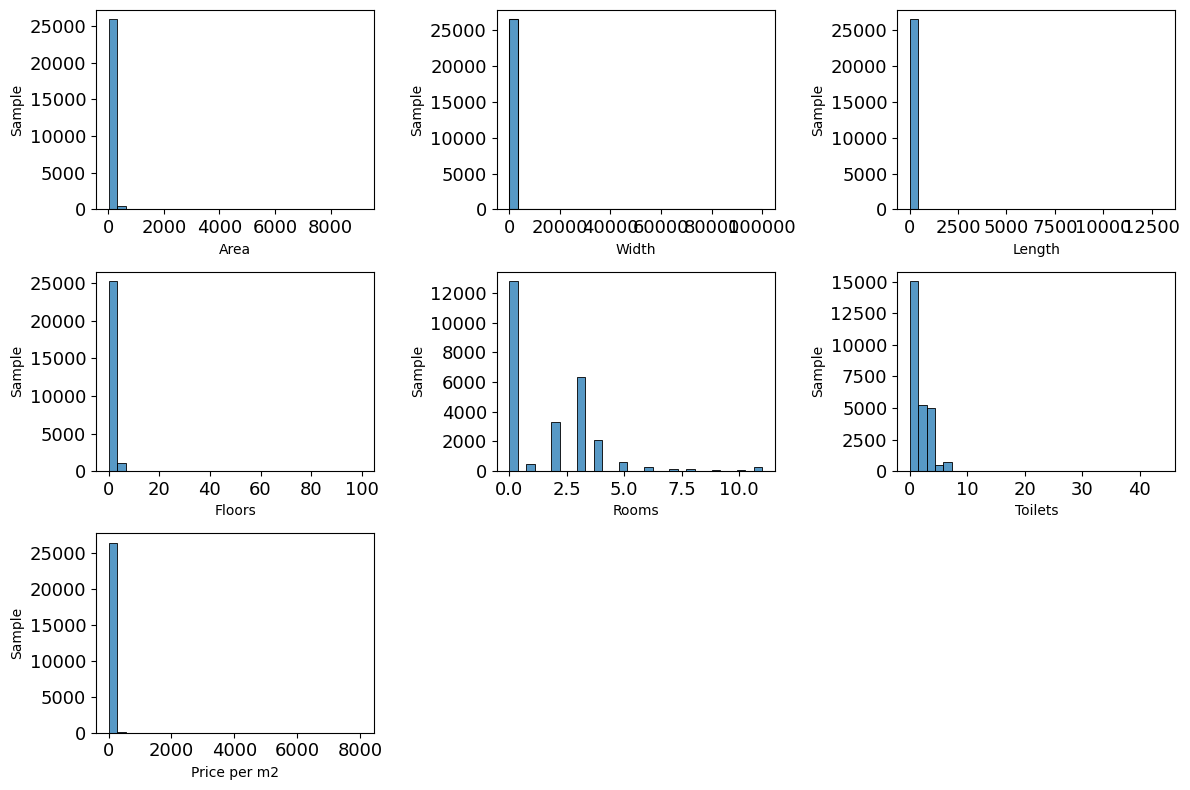

In [27]:
numerical_columns = ["Area", "Width", "Length", "Floors", "Rooms", "Toilets", "Price per m2"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, bins=30)
    plt.ylabel('Sample')
    plt.xlabel(col)
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()


In [ ]:
cols = ["Area", "Width", "Length", "Floors", "Rooms", "Toilets", "Price per m2"]

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 4 * iqr  
    lower_bound = q1 - 4 * iqr  

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

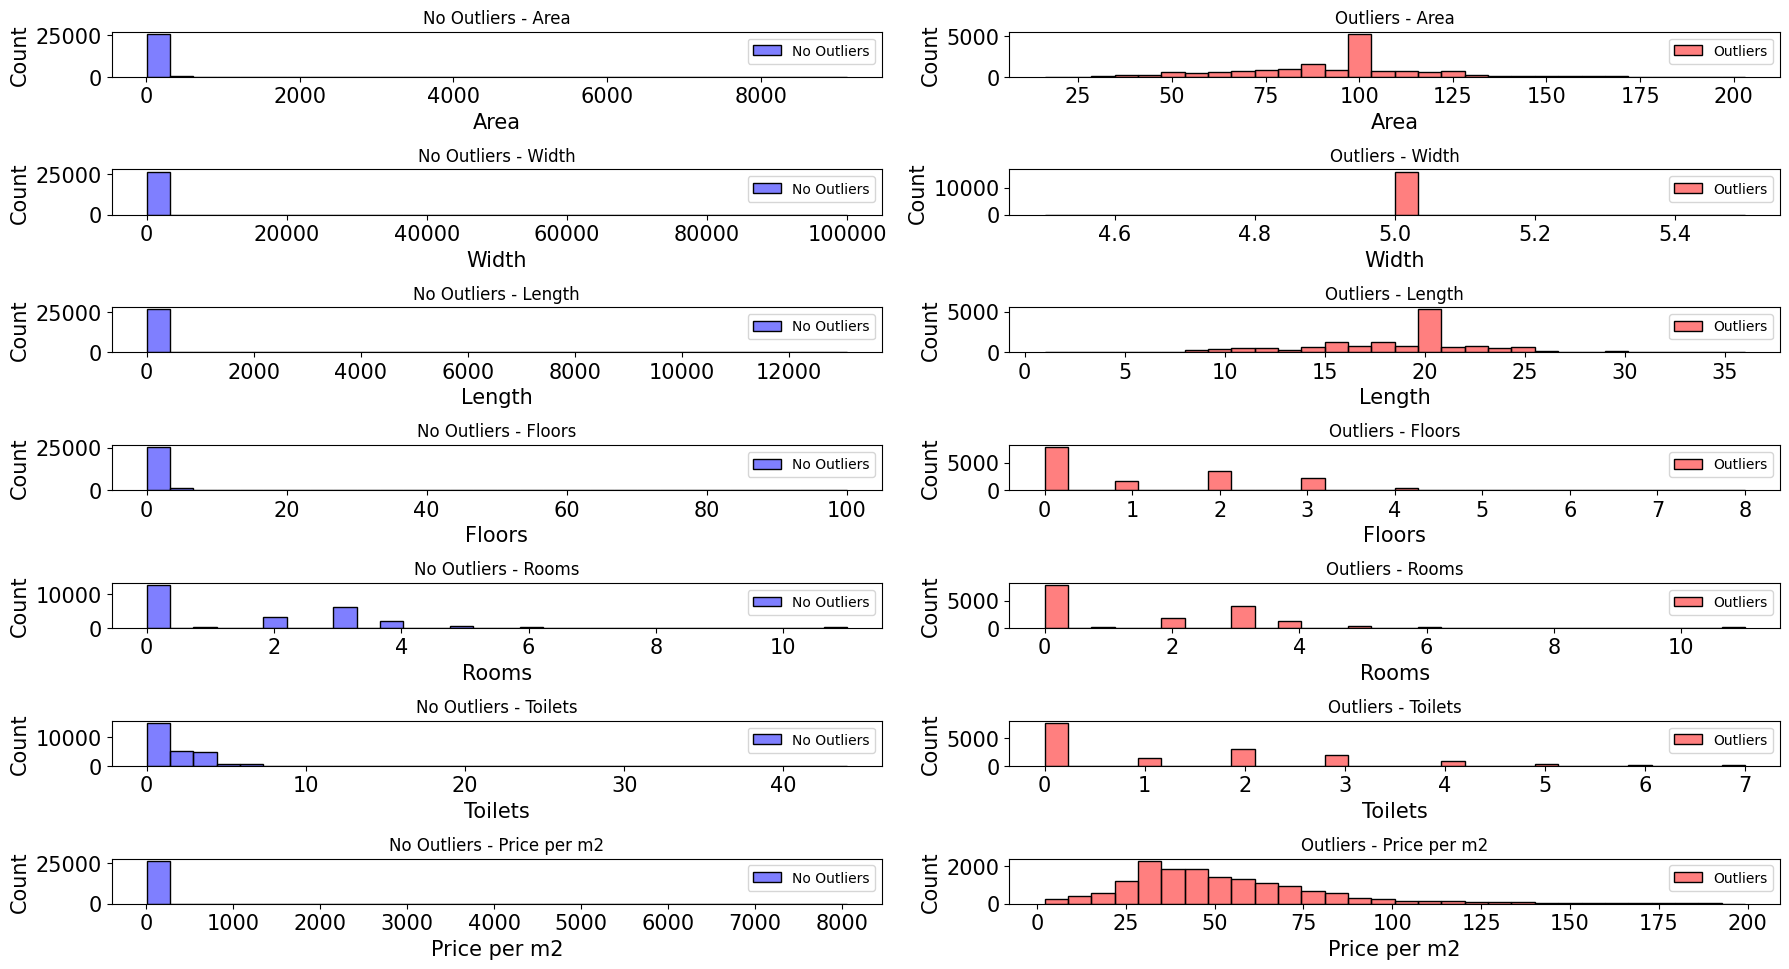

In [29]:
cols = ["Area", "Width", "Length", "Floors", "Rooms", "Toilets", "Price per m2"]

plt.figure(figsize=(18, 12))
for i, col in enumerate(cols, 1):
    plt.subplot(9, 2, 2*i-1) 
    sns.histplot(data=df_noOutliers, x=col, bins=30, color='blue', alpha=0.5, label='No Outliers')
    plt.ylabel('Count', fontsize = 15)
    plt.xlabel(col, fontsize = 15)   
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15) 
    plt.title('No Outliers - ' + col)
    plt.legend()

    plt.subplot(9, 2, 2*i) 
    sns.histplot(data=df, x=col, bins=30, color='red', alpha=0.5, label='Outliers')
    plt.ylabel('Count', fontsize = 15)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15) 
    plt.title('Outliers - ' + col)
    plt.legend()

plt.tight_layout()
plt.show()

In [30]:
df.to_csv('CleanData.csv', index=False)

## Conclusion